# Haberman's Survival Dataset - Exploratory Data Analysis (EDA)

### 1.Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust

### 2.Data Setup

In [3]:
haberman = pd.read_csv('haberman.csv',header=None,names=['age','year_of_operation','axillary_nodes','survival_status'])
haberman

,age,year_of_operation,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# data-points and features
print ("No of datapoints:"+str(haberman.shape[0]))
print ("No of features:"+str(haberman.shape[1]))

No of datapoints:306
No of features:4


In [5]:
# column names in dataset
print(haberman.columns)

Index(['age', 'year_of_operation', 'axillary_nodes', 'survival_status'], dtype='object')


In [6]:
# dataset info
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                  306 non-null int64
year_of_operation    306 non-null int64
axillary_nodes       306 non-null int64
survival_status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
# converting type of survival_status feature from int to category
haberman['survival_status'] = haberman['survival_status'].astype('category')
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                  306 non-null int64
year_of_operation    306 non-null int64
axillary_nodes       306 non-null int64
survival_status      306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


In [8]:
# Unique classes
haberman["survival_status"].unique()

[1, 2]
Categories (2, int64): [1, 2]

In [9]:
# data points for each class
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [10]:
# relative frequencies of the unique values.
haberman["survival_status"].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: survival_status, dtype: float64

In [11]:
# High level Statistics
haberman.describe()

,age,year_of_operation,axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observation(s):**  
1.The dataset contains 306 datapoints and 4 features(including class feature).  
2.The dataset is a imbalanced dataset as the number of data points for survival_status '1' are   225 and for survival_status '2' are 81.  
3.The data set contains around 73% of values with survival status '1' and 26% values with survival status '2'.  
4.Around 25% of patients have Zero axillary_nodes  and 75% of patients have less than 4 axillary_nodes.   
5.Max number of axillary_nodes are 52.   
6.The age of the patients starting from 30 to 83 with the median of 52.

**3.Objective:**  
Perform Univaraite analysis to understand which features are useful towards classification.

### 3.1 Distibution Plots

In [12]:
import numpy as np
haberman_survival_status_1 = haberman.loc[haberman["survival_status"] == 1];
haberman_survival_status_2 = haberman.loc[haberman["survival_status"] == 2];

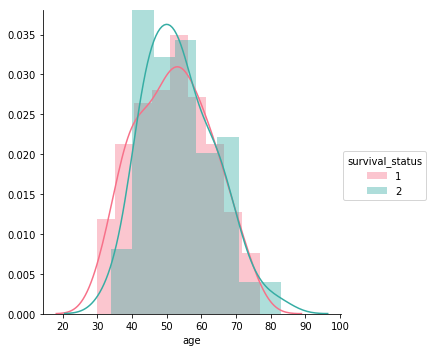

In [35]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="survival_status", size=5,palette="husl") \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

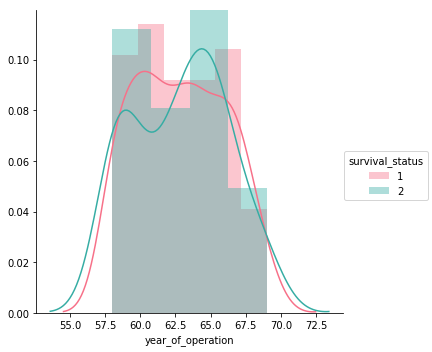

In [36]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="survival_status", size=5,palette="husl") \
   .map(sns.distplot, "year_of_operation") \
   .add_legend();
plt.show();

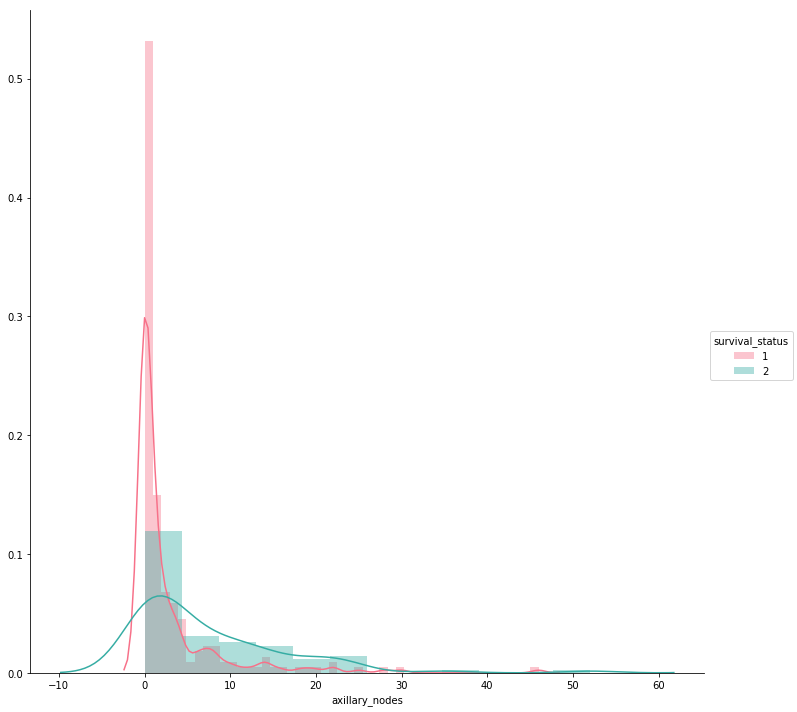

In [37]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="survival_status", size=10,palette="husl") \
   .map(sns.distplot, "axillary_nodes") \
   .add_legend();
plt.show();

**Observation(s)**  
1) axillary_nodes is most significant feature to indentify survival status.  
2) The number of axillary_nodes for survival_status '1' is highly dense from 0 to 5.

## 3.2 PDF & CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


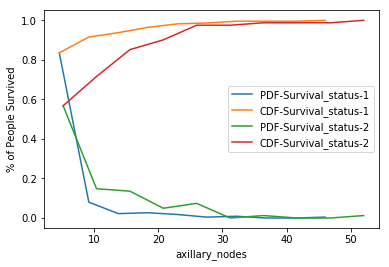

In [23]:
# survival_status_1
counts, bin_edges = np.histogram(haberman_survival_status_1['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF-Survival_status-1')
plt.plot(bin_edges[1:], cdf,label='CDF-Survival_status-1')


# survival_status_2
counts, bin_edges = np.histogram(haberman_survival_status_2['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF-Survival_status-2')
plt.plot(bin_edges[1:], cdf,label='CDF-Survival_status-2')
plt.legend(loc='center right')
plt.xlabel('axillary_nodes')
plt.ylabel('% of People Survived')
plt.show();

**Observation(s)**  
1) 85% of survived patients have less than 5 axillary_nodes.

## 3.3 Box Plot

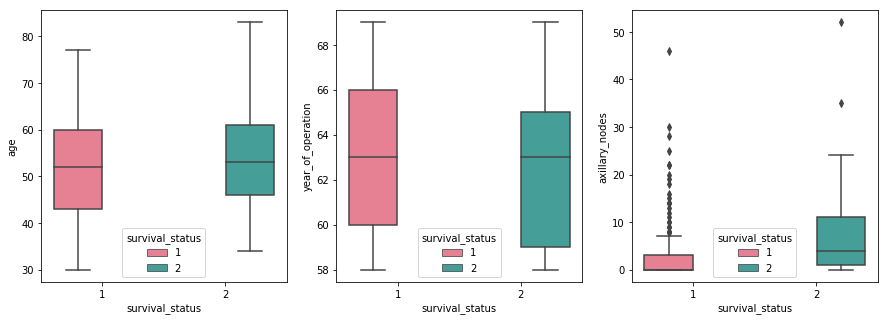

In [31]:
fig,axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(haberman.columns)[:-1]):
    bp = sns.boxplot( x='survival_status', y=feature, data=haberman, palette="husl" ,ax=axes[i],hue='survival_status')
plt.show()

**Observation**  
1) Patients who had undergone operation after 1966 have higher chance of survival compare to others.

## 3.4 Violin Plot

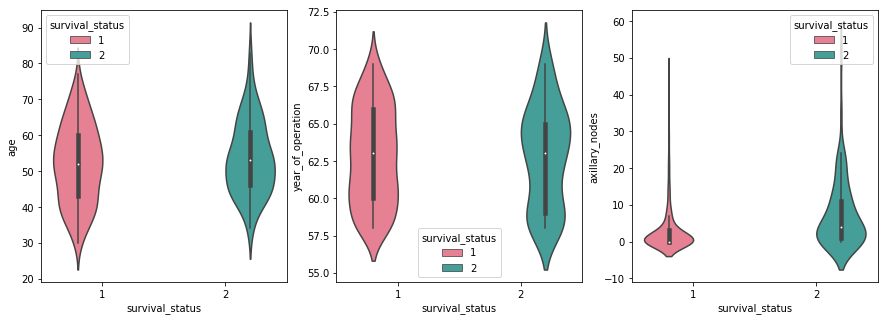

In [34]:
import warnings
warnings.filterwarnings("ignore")
fig,axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=haberman, palette="husl" ,ax=axes[i],hue='survival_status')
plt.show()

**Observation**  
1) Patients who had undergone operation before 1958 have less chance of survival compare to others.

## 3.5 Mean & Std-deviation

In [129]:
#Mean, Variance, Std-deviation,  
print("\n***age***\n")
print("Means:")
print(np.mean(haberman_survival_status_1["age"]))
print(np.mean(haberman_survival_status_2["age"]))

print("\nStd-dev:");
print(np.std(haberman_survival_status_1["age"]))
print(np.std(haberman_survival_status_2["age"]))

print("\n***year_of_operation***\n")

print("Means:")
print(np.mean(haberman_survival_status_1["year_of_operation"]))
print(np.mean(haberman_survival_status_2["year_of_operation"]))

print("\nStd-dev:");
print(np.std(haberman_survival_status_1["year_of_operation"]))
print(np.std(haberman_survival_status_2["year_of_operation"]))

print("\n***axillary_nodes***\n")

print("Means:")
print(np.mean(haberman_survival_status_1["axillary_nodes"]))
print(np.mean(haberman_survival_status_2["axillary_nodes"]))

print("\nStd-dev:");
print(np.std(haberman_survival_status_1["axillary_nodes"]))
print(np.std(haberman_survival_status_2["axillary_nodes"]))


***age***

Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131

***year_of_operation***

Means:
62.86222222222222
62.82716049382716

Std-dev:
3.2157452144021956
3.3214236255207883

***axillary_nodes***

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


## 3.6 Meadian,Quantiles,Percentiles & IQR

In [131]:
#Median, Quantiles, Percentiles, IQR.
print("\n******age*****\n")
print("\nMedians:")
print(np.median(haberman_survival_status_1["age"]))
print(np.median(haberman_survival_status_2["age"]))

print("\nQuantiles:")
print(np.percentile(haberman_survival_status_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survival_status_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_survival_status_1["age"],90))
print(np.percentile(haberman_survival_status_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survival_status_1["age"]))
print(robust.mad(haberman_survival_status_2["age"]))

print("\n******year_of_operation*****\n")
print("\nMedians:")
print(np.median(haberman_survival_status_1["year_of_operation"]))
print(np.median(haberman_survival_status_2["year_of_operation"]))

print("\nQuantiles:")
print(np.percentile(haberman_survival_status_1["year_of_operation"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survival_status_2["year_of_operation"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_survival_status_1["year_of_operation"],90))
print(np.percentile(haberman_survival_status_2["year_of_operation"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survival_status_1["year_of_operation"]))
print(robust.mad(haberman_survival_status_2["year_of_operation"]))

print("\n******axillary_nodes********\n")
print("\nMedians:")
print(np.median(haberman_survival_status_1["axillary_nodes"]))
print(np.median(haberman_survival_status_2["axillary_nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_survival_status_1["axillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_survival_status_2["axillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_survival_status_1["axillary_nodes"],90))
print(np.percentile(haberman_survival_status_2["axillary_nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survival_status_1["axillary_nodes"]))
print(robust.mad(haberman_survival_status_2["axillary_nodes"]))


******age*****


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816

******year_of_operation*****


Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806

******axillary_nodes********


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Observation(s)**  
1) 90% of survived patients have less than 8 axillary_nodes.

**4 .Objective:**  
Perform Multivariate analysis to understand which features are useful towards classification.

## Multivariate Analysis

## 4.1 Pair Plot

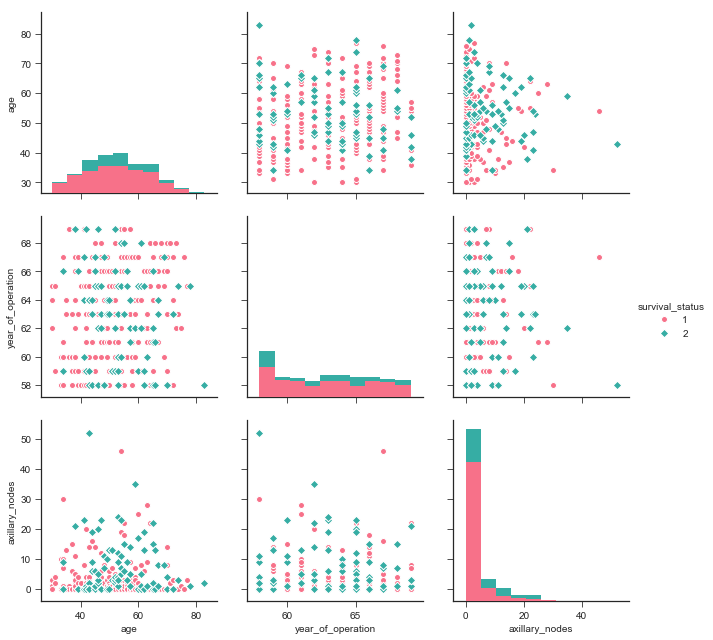

In [124]:
sns.set_style("ticks");
sns.pairplot(haberman, hue="survival_status", size=3,palette="husl",markers=["o","D"],vars =["age","year_of_operation","axillary_nodes"]);
plt.show()

**Observation(s)**  
1) axillary_nodes and year_of_operation are most useful features to identify different survival statuses.  
2) we can see the better seperation between the two classes than other scatter plots.